# Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
path = '/Users/Angeles/Desktop/USA_elections/'
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.min_rows = 20

[1. Cleaning Presidential Elections](#num1)

[2. Cleaning Senatorial Elections](#num2)

[3. Cleaning House Elections](#num3)

[4. Cleaning Guvernatorial](#num4)

<a name='num1'></a>
## 1. Cleaning Presidential Elections data

In [4]:
dfp = pd.read_csv(path + 'presidential_by_state.csv')
dfp.head()

,State,1789,1792,1796,1800†,1804,1808,1812,1816,1820,...,1984,1988,1992,1996,2000‡,2004,2008,2012,2016‡,2020
0,Alabama\n,\n,\n,\n,\n,\n,\n,\n,\n,DR\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
1,Alaska\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
2,Arizona\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,D\n,R\n,R\n,R\n,R\n,R\n,D\n
3,Arkansas\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,R\n,R\n,R\n,R\n,R\n,R\n
4,California\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n


In [5]:
dfp['State'].unique()

array(['Alabama\n', 'Alaska\n', 'Arizona\n', 'Arkansas\n', 'California\n',
       'Colorado\n', 'Connecticut\n', 'Delaware\n', 'D.C.\n', 'Florida\n',
       'Georgia\n', 'Hawaii\n', 'Idaho\n', 'Illinois\n', 'Indiana\n',
       'Iowa\n', 'Kansas\n', 'Kentucky\n', 'Louisiana\n', 'Maine\n',
       'Maryland\n', 'Massachusetts\n', 'Michigan\n', 'Minnesota\n',
       'Mississippi\n', 'State\n', 'Missouri\n', 'Montana\n',
       'Nebraska\n', 'Nevada\n', 'New Hampshire\n', 'New Jersey\n',
       'New Mexico\n', 'New York\n', 'North Carolina\n', 'North Dakota\n',
       'Ohio\n', 'Oklahoma\n', 'Oregon\n', 'Pennsylvania\n',
       'Rhode Island\n', 'South Carolina\n', 'South Dakota\n',
       'Tennessee\n', 'Texas\n', 'Utah\n', 'Vermont\n', 'Virginia\n',
       'Washington\n', 'West Virginia\n', 'Wisconsin\n', 'Wyoming\n'],
      dtype=object)

By looking at the possible results of the election, we see that when elections where not held, there is ane empty space string  .replace '\xa0'

In [6]:
dfp[dfp['State']=='Alabama\n']['1789'].unique()

array(['\xa0\n'], dtype=object)

In [7]:
def clean_strings_presi(df):
    return(df
         .replace({'State': {' ':'_' , '\n':'' } }, regex=True)
         .replace('\n','',regex=True)
         .replace('\xa0','NaN')
         .rename(columns=lambda s: s.replace("†",'').replace('‡',''))
         .pipe(lambda df: df.drop(df[df.State.isin(['State','D.C.'])].index))
         .set_index('State')
         .T
         )

In [8]:
dfp2  = clean_strings_presi(dfp)
dfp2.sample(10)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
1816,NaN,NaN,NaN,NaN,NaN,NaN,F,F,NaN,DR,...,NaN,DR,NaN,NaN,DR,DR,NaN,NaN,NaN,NaN
1968,AI,R,R,AI,R,R,D,R,R,AI,...,R,R,D,R,R,R,D,D,R,R
2008,R,R,R,R,D,D,D,D,D,R,...,R,R,R,R,D,D,D,R,D,R
1892,D,NaN,NaN,D,D,PO,D,D,D,D,...,R,D,D,NaN,R,D,R,D,D,R
1992,R,R,R,D,D,D,D,D,R,D,...,R,D,R,R,D,R,D,D,D,R
1904,D,NaN,NaN,D,R,R,R,R,D,D,...,R,D,D,R,R,D,R,R,R,R
1980,R,R,R,R,R,R,R,R,R,D,...,R,R,R,R,R,R,R,D,R,R
1860,SD,NaN,NaN,SD,R,NaN,R,SD,SD,SD,...,NaN,CU,SD,NaN,R,CU,NaN,NaN,R,NaN
2020,R,R,D,R,D,D,D,D,R,D,...,R,R,R,R,D,D,D,R,D,R
1888,D,NaN,NaN,D,R,R,D,D,D,D,...,NaN,D,D,NaN,R,D,NaN,D,R,NaN


In [9]:
def melt_presi(df):
    return(pd.melt(df.reset_index(), id_vars='index')
     .rename(columns={'index':"Year",'value':'Presi_Result'})
     .astype({'Year':'int16'})
    )

Let's see when the results are equal to ''

In [10]:
dfp2 = melt_presi(dfp2)
dfp2[dfp2['Presi_Result']=='']

,Year,State,Presi_Result
1829,1789,New_York,


Since we won't use 1789 on the analysis, we consider '' to be a NaN

In [11]:
def party(x):
    if x =='D':
        return('Democratic')
    elif x == 'R':
        return('Republican')
    elif x == 'NaN':
        return('NaN')
    else:
        return('Other')
def change_party(df):
    return df.assign(Presi_Result = df.Presi_Result.apply(lambda x: party(x)))

In [12]:
dfp2 = change_party(dfp2)
dfp2.sample(20)

,Year,State,Presi_Result
1830,1792,New_York,Other
2363,1800,South_Dakota,NaN
2038,1916,Ohio,Democratic
324,1904,Colorado,Republican
947,1800,Kentucky,Other
2463,1964,Tennessee,Democratic
254,1860,California,Republican
647,2016,Hawaii,Democratic
393,1944,Connecticut,Democratic
2603,1816,Vermont,Other


In [13]:
dfp2[dfp2['Year']>1964].Presi_Result.value_counts()

Republican    440
Democratic    255
Other           5
Name: Presi_Result, dtype: int64

### Complete module:
Module to import onto other notebooks, with all the cleaning steps together.

In [14]:
def clean_president(df):
    return(change_party(
           melt_presi(
           clean_strings_presi(
               df       )
                        )
                        )
            )

In [15]:
dfp3 = clean_president(dfp)

In [16]:
dfp3

,Year,State,Presi_Result
0,1789,Alabama,NaN
1,1792,Alabama,NaN
2,1796,Alabama,NaN
3,1800,Alabama,NaN
4,1804,Alabama,NaN
5,1808,Alabama,NaN
6,1812,Alabama,NaN
7,1816,Alabama,NaN
8,1820,Alabama,Other
9,1824,Alabama,Other


<a name='num2'></a>
## 2. Cleaning Senator's data

In [14]:
dfs = pd.read_csv(path + 'senators_by_state.csv')
dfs.head()

,1789,1789.1,1789.2,1790,1792,1794,1796,1798,1800,1802,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Alabama\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R\n,R\n,—\n,R\n,R\n,—\n,R\n,R\n,—\n,R\n
Alaska\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R\n,R\n,—\n,D\n,R\n,—\n,R\n,R\n,—\n,R\n
Arizona\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,—\n,R\n,R\n,—\n,R\n,R\n,—\n,R\n,D\n,—\n
Arkansas\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D\n,D\n,—\n,D\n,R\n,—\n,R\n,R\n,—\n,R\n
California\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,—\n,D\n,D\n,—\n,D\n,D\n,—\n,D\n,D\n,—\n


We check with the website https://en.wikipedia.org/wiki/List_of_United_States_Senate_election_results_by_state that a year has the correct winners

In [17]:
dfs['1856']

Alabama\n           —\n
Alaska\n            NaN
Arizona\n           NaN
Arkansas\n          —\n
California\n        D\n
Colorado\n          NaN
Connecticut\n       R\n
Delaware\n          D\n
Florida\n           D\n
Georgia\n           —\n
Hawaii\n            NaN
Idaho\n             NaN
Illinois\n          —\n
Indiana\n           D\n
Iowa\n              —\n
Kansas\n            NaN
Kentucky\n          —\n
Louisiana\n         —\n
Maine\n             D\n
Maryland\n          A\n
Massachusetts\n     R\n
Michigan\n          R\n
Minnesota\n          \n
Mississippi\n       D\n
Missouri\n          D\n
Montana\n           NaN
Nebraska\n          NaN
Nevada\n            NaN
New Hampshire\n     —\n
New Jersey\n        D\n
New Mexico\n        NaN
New York\n          R\n
North Carolina\n    —\n
North Dakota\n      NaN
Ohio\n              R\n
Oklahoma\n          NaN
Oregon\n             \n
Pennsylvania\n      R\n
Rhode Island\n      R\n
South Carolina\n    —\n
South Dakota\n      NaN
Tennessee\n     

In [15]:
# removeunwanted "\n" substring
def clean_strings_senate(df):
    return (df
        .replace(to_replace=r'\n', value='', regex=True)
        .pipe(lambda df: df.assign(State=df.index
                           .str.replace('\n','')
                           .str.replace(' ','_')))
        .set_index('State')
        .T
        .drop(['1789.1','1789.2'])
        )

In [16]:
def melt_senate(
    df):
    return (
        pd.melt(df.reset_index(), id_vars='index')
       .rename(columns={'index':"Year",'value':'Sen_Result'})
       .astype({'Year':'int16'})
       )

In [17]:
dfs2 = melt_senate(clean_strings_senate(dfs))

dfs2[dfs2['State']=='Delaware']

,Year,State,Sen_Result
819,1789,Delaware,PA
820,1790,Delaware,PA
821,1792,Delaware,PA
822,1794,Delaware,—
823,1796,Delaware,F
824,1798,Delaware,F
825,1800,Delaware,—
826,1802,Delaware,F
827,1804,Delaware,F
828,1806,Delaware,—


In [18]:
dfs2.Sen_Result.unique()

array([nan, '2DR', '—', 'DR', 'J', 'D', '2R', 'R', '2D', 'AM', 'SR', 'PA',
       'F', 'AJ', 'W', 'LR', 'I', 'AA', 'Sp', 'Po', 'FS', '2AA', 'A', 'U',
       '', '\xa0', 'Sp[4]', 'FL', 'Si', 'C', 'Nu', 'Sp[5]', 'U[6]',
       'N[7]', 'Ra', '2U', 'Pr'], dtype=object)

In [19]:
dfs2[dfs2['State'] == 'Minnesota']

,Year,State,Sen_Result
2574,1789,Minnesota,NaN
2575,1790,Minnesota,NaN
2576,1792,Minnesota,NaN
2577,1794,Minnesota,NaN
2578,1796,Minnesota,NaN
2579,1798,Minnesota,NaN
2580,1800,Minnesota,NaN
2581,1802,Minnesota,NaN
2582,1804,Minnesota,NaN
2583,1806,Minnesota,NaN


In [23]:
dfs2[dfs2['Sen_Result'] == '\xa0']

,Year,State,Sen_Result
2608,1856,Minnesota,
4246,1856,Oregon,
4800,1794,Tennessee,


In [20]:
def party_sen(x):
    if x =='D':
        return('Democratic')
    elif x == 'R':
        return('Republican')
    elif pd.isnull(x) == True or x=='\xa0' or x == '' or x =='—':
        return('NaN')
    else:
        return('Other')

def change_party_senate(
    df):
    
    return(df
           .assign(Sen_Result = df
                                  .Sen_Result.apply(lambda x: party_sen(x)))
          )

### Complete module:
Module to import onto other notebooks, with all the cleaning steps together.

In [21]:
def clean_senate(
    df):
    return(change_party_senate(
        melt_senate(
        clean_strings_senate(df)
        )
       )
        )

In [22]:
dfs3 = clean_senate(dfs)
dfs3.head()

,Year,State,Sen_Result
0,1789,Alabama,NaN
1,1790,Alabama,NaN
2,1792,Alabama,NaN
3,1794,Alabama,NaN
4,1796,Alabama,NaN


<a name='num3'></a>
## 3. Cleaning House of Representatives data

In [23]:
dfh = pd.read_csv(path+'representatives_by_state.csv')
dfh.head()

,Name,State,Term,Party
0,"SUMTER, Thomas",South Carolina,1st Congress (1789-1791),Anti-Administration
1,"BLAND, Theodorick",Virginia,1st Congress (1789-1791),Anti-Administration
2,"ASHE, John Baptista",North Carolina,1st Congress (1789-1791),Anti-Administration
3,"MATHEWS, George",Georgia,1st Congress (1789-1791),Anti-Administration
4,"BLOODWORTH, Timothy",North Carolina,1st Congress (1789-1791),Anti-Administration


Before we pivot the table we need to find duplicated entries

In [24]:
dfh[dfh[['Name','State','Term','Party']].duplicated(keep=False)]

,Name,State,Term,Party
39639,"SABLAN, Gregorio Kilili Camacho",Error,117th Congress (2021-2023),Democrat
39640,"SABLAN, Gregorio Kilili Camacho",Error,117th Congress (2021-2023),Democrat
39665,"SAN NICOLAS, Michael",Error,117th Congress (2021-2023),Democrat
39666,"SAN NICOLAS, Michael",Error,117th Congress (2021-2023),Democrat
39723,"PLASKETT, Stacey E.",Error,117th Congress (2021-2023),Democrat
39724,"PLASKETT, Stacey E.",Error,117th Congress (2021-2023),Democrat
39819,"GONZÁLEZ-CÓLON, Jenniffer",Error,117th Congress (2021-2023),Republican
39820,"GONZÁLEZ-CÓLON, Jenniffer",Error,117th Congress (2021-2023),Republican
39875,"RADEWAGEN, Aumua Amata Coleman",Error,117th Congress (2021-2023),Republican
39876,"RADEWAGEN, Aumua Amata Coleman",Error,117th Congress (2021-2023),Republican


The duplicates and the state = 'Error', are errors from the website
https://voteview.com/congress/house (see image below).
Thus, we find the state for each of these representatives using google.

Sablan, Gregorio Kilili Camacho representes Mariana Islands
San Nicolas, Michael represents Guam
Plaskett, Stacey E.  represents Virgin Islands
Gonzalez-Colon, Jennifer represents Puerto Rico
Radewagen, Aumua Amata Coleman represents America Samoa

Since they represent other USA territories, we will remove these representatives from our  analysis.

<div>
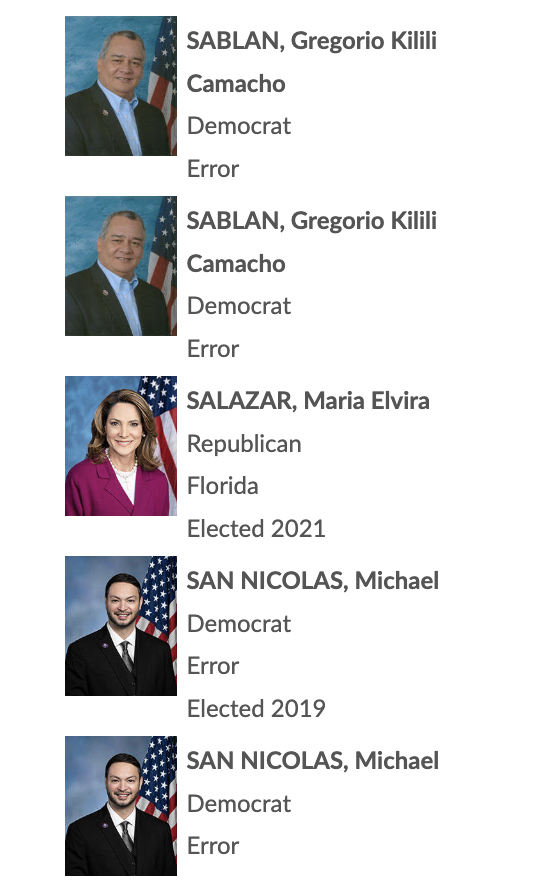
</div>


In [29]:
dfh.Party.unique()

array(['Anti-Administration', 'Pro-Administration', 'Democrat-Republican',
       'Federalist', 'Crawford Republican', 'Jackson Republican',
       'Jackson Federalist', 'Adams-Clay Republican',
       'Adams-Clay Federalist', 'Crawford Federalist', 'Jacksonian',
       'Adamsite', 'Anti-Jacksonian', 'Anti Mason', 'Nullifier', 'Whig',
       'Democrat', 'Independent', 'Conservative', 'Ind. Democrat',
       'Ind. Whig', 'Law and Order', 'American', 'Free Soiler',
       'Constitutional Unionist', 'States Righter', 'Opposition',
       'Republican', 'Anti-Lecompton Democrat', 'Unionist',
       'Unconditional Unionist', 'Ind. Republican',
       'Conservative Republican', 'Liberal Republican',
       'National Greenbacker', 'Readjuster', 'Union Laborer', 'Populist',
       'Silver', 'Silver Republican', 'Progressive Republican',
       'Socialist', 'Progressive', 'Prohibitionist', 'Farmer-Laborer',
       'American Laborer', 'Liberal'], dtype=object)

In [24]:
def party(x):
    if x=='Democratic' or x == 'Democrat':
        return('Democratic')
    elif x == 'Republican':
        return('Republican')
    else:
        return('Other')
def clean_house_strings(df):
    return (df
     [['State', 'Term', 'Party']]
     .replace({'State': {' ':'_'} }, regex=True)
     .assign(year=df.Term.str.extract(r'\(([^\.]*)-'))
     .astype({'year':'int16'})
     .assign(House_Result = df.Party.apply(lambda x: party(x)))
#     .drop(columns='Term')
    )

from https://www.senate.gov/reference/Index/Elections.htm
    
"National Elections take place every even-numbered year. Every four years the president, vice president, one-third of the Senate, and the entire House are up for election (on-year elections). On even-numbered years when there isn't a presidential election, one-third of the Senate and the whole House are included in the election (off-year elections)."

Therefore, to the house term we substract one year to get the year of election. E.g. the term "1903-1905" was elected on 1902



In [27]:
def substract_year(
    df):
    return df.assign(year = df.year-1)

def group_house(
    df):
    return(df
    .groupby(['State','year','House_Result'])
         .size()
         .to_frame(name = 'House_Size')
    .reset_index()
    .set_index('year')
    .reset_index()
    .pipe(substract_year)
    .rename(columns={'year':'Year'})
       )

### Complete module:
Module to import onto other notebooks, with all the cleaning steps together.

In [31]:
def clean_house(
    df):
    return(group_house(
    clean_house_strings(
        df)
            )
    )

In [32]:
dfh2 = clean_house(dfh)

In [33]:
dfh2.House_Result.unique()

array(['Other', 'Democratic', 'Republican'], dtype=object)

In [34]:
dfh2[(dfh2['Year']==1818)].State

0              Alabama
705        Connecticut
878           Delaware
1137           Georgia
1399          Illinois
1600           Indiana
2085          Kentucky
2279         Louisiana
2571          Maryland
2765     Massachusetts
3260       Mississippi
3903     New_Hampshire
4042        New_Jersey
4328          New_York
4560    North_Carolina
4813              Ohio
5253      Pennsylvania
5475      Rhode_Island
5613    South_Carolina
5840         Tennessee
6263           Vermont
6390          Virginia
Name: State, dtype: object

<a name='num4'></a>
## 4. Cleaning Governor's data

#### Load Dataset

In [75]:
path = '/Users/angeles/Desktop/USA_elections/'
dfg = pd.read_csv(path + 'governors_by_state.csv')
dfg.head()

,State,Governor,Term,Party
0,Alabama,William Wyatt Bibb(1781–1820)\n,"November 9, 1819[b]–July 10, 1820[15](died in ...",Democratic-Republican\n
1,Alabama,Thomas Bibb(1783–1839)\n,"July 10, 1820[g]–November 9, 1821(not candidat...",Democratic-Republican\n
2,Alabama,Israel Pickens(1780–1827)\n,"November 9, 1821–November 25, 1825(term-limite...",Democratic-Republican\n
3,Alabama,John Murphy(1786–1841)\n,"November 25, 1825–November 25, 1829(term-limit...",JacksonDemocrat\n
4,Alabama,Gabriel Moore(1785–1844)\n,"November 25, 1829–March 3, 1831(resigned)[h]\n",JacksonDemocrat\n


#### Quick View

In [76]:
(dfg
 [['State','Governor']]
 .groupby('State')
 .count()
)

,Governor
State,
Alabama,61
Alaska,14
Arizona,28
Arkansas,58
California,41
Colorado,43
Connecticut,73
Delaware,74
Florida,46


### 4.1 Types and Memory usage

In [77]:
dfg.dtypes

State       object
Governor    object
Term        object
Party       object
dtype: object

In [78]:
dfg.memory_usage(deep=True).sum()

1119485

In [79]:
dfg.astype(str).memory_usage(deep=True).sum()

1119485

### 4.2 Cleaning strings 

- Separate Term in Office into two columns: start_term and end_term
- Remove birth and death dates from name
- Clean up new lines, spaces, dashes, etc,

In [80]:
# Remove birth-death from "Name" column. 


def clean_govs_strings(df):
    months = ['January','February','March','April','May','June','July',\
            'August','September','October','November','December']

    pattern_gov = r'(\w*\.)|('+r'|'\
              .join([r'{}'\
              .format(w) for w in months])+r').*|\(.*|\d.*|\n' # removes everything next to name

    return (df
     .assign(start_term = df.Term.str.split('–|-', 1, expand=True)[0],
             end_term = df.Term.str.split('–|-', 1, expand=True)[1])
     .drop(columns=['Term'])
     .replace({'start_term':r'\(.*|\[.*|\n.*|\s',
               'end_term':r'\(.*|\[.*|\n.*|\s',
               'Governor':pattern_gov,
               'Party':'\n|\[.*\]'},
              value='', regex =True)
     .replace({'end_term':r'.*Incumbent.*|.*[pP]resent.*',
              'start_term':r'(^.*Taking.*$)'}, 
              value= {'end_term':'January1,2025',
                     'start_term':'January1,2023'}, regex=True)
    .rename(columns={'Party':'Gov_Result'})
     )

In [81]:
dfg2 = clean_govs_strings(dfg)

dfg2

,State,Governor,Gov_Result,start_term,end_term
0,Alabama,William Wyatt Bibb,Democratic-Republican,"November9,1819","July10,1820"
1,Alabama,Thomas Bibb,Democratic-Republican,"July10,1820","November9,1821"
2,Alabama,Israel Pickens,Democratic-Republican,"November9,1821","November25,1825"
3,Alabama,John Murphy,JacksonDemocrat,"November25,1825","November25,1829"
4,Alabama,Gabriel Moore,JacksonDemocrat,"November25,1829","March3,1831"
5,Alabama,Samuel Moore,Democratic,"March3,1831","November26,1831"
6,Alabama,John Gayle,Democratic,"November26,1831","November21,1835"
7,Alabama,Clement Comer Clay,Democratic,"November21,1835","July17,1837"
8,Alabama,Hugh McVay,Democratic,"July17,1837","November21,1837"
9,Alabama,Arthur Bagby,Democratic,"November21,1837","November22,1841"


Before 1900 data, some Governors have errors due to their names having a sufix such as "1st president". We will ignore these errors by removing data before 1900.

### 4.3 Finding Duplicates and data Errors

In [82]:
for index, row in dfg2[dfg2[['State','Governor']].duplicated()].iterrows():
    print(row['State'], row['Governor'], row['start_term'])

Alabama William  Jelks June11,1901
Alabama Bibb Graves January15,1935
Alabama Jim Folsom January18,1955
Alabama George Wallace January19,1971
Alabama George Wallace January18,1983
Alabama Fob James January17,1995
Alaska William  Egan December7,1970
Alaska Wally Hickel December3,1990
Arizona George   Hunt December25,1917
Arizona Thomas Edward Campbell January6,1919
Arizona George   Hunt January1,1923
Arizona George   Hunt January5,1931
Arkansas Bill Clinton  January11,1983
California Jerry Brown January3,2011
Colorado John Long Routt January13,1891
Colorado Alva Adams January12,1897
Colorado Alva Adams January10,1905
Colorado James Hamilton Peabody March16,1905
Colorado Edwin  Johnson January11,1955
Connecticut Henry  Edwards May6,1835
Connecticut James  English May4,1870
Connecticut Marshall Jewell May16,1871
Connecticut Raymond  Baldwin January6,1943
Delaware Joseph Haslet     January21,1823
Delaware Charles Polk      May9,1836
Delaware Elbert  Carvel     January17,1961
Florida Willia

By inspection we see that California has twice the governor Hiram Johnson, and that one of the enries has a bad "Term" date.
This was a scraping issue, and we simply remove this entry.
Governor Hiram Johnson was from the Republican party during his term in office. However, he switched to Republican/Progressive in 1920.
We keep Hiram as Republican for simplicity and eliminate entry 184.

In [67]:
dfg.iloc[184]

State                                       California
Governor                                 Progressive\n
Term        John M. Eshleman(died February 28, 1916)\n
Party                                     Republican\n
Name: 184, dtype: object

We cant pivot the table if there are any duplicates on the dates of Starting Term, since we want to use these dates as indices.

In [68]:
print(len(dfg2[dfg2[['State',  'start_term']].duplicated(keep=False)]))
dfg2[dfg2[['State',  'start_term']].duplicated(keep=False)]

8


,State,Governor,Gov_Result,start_term,end_term
31,Alabama,William Jelks,Democratic,"December1,1900","December26,1900"
32,Alabama,William Samford,Democratic,"December1,1900","June11,1901"
847,Louisiana,John McEnery,Democratic,"January13,1873","May22,1873"
848,Louisiana,William Pitt Kellogg,Republican,"January13,1873","January8,1877"
849,Louisiana,Stephen Packard,Republican,"January8,1877","April25,1877"
850,Louisiana,Francis Nicholls,Democratic,"January8,1877","January14,1880"
903,Maine,John Dana,Democratic,"January3,1844","January3,1844"
904,Maine,Hugh Anderson,Democratic,"January3,1844","May12,1847"


31- William Jelks served as acting governor of Alabama between December 1 and December 26, 1900 when Governor William J. Samford was out-of-state seeking medical treatment.

847- John McEnery (March 31, 1833, Petersburg, Virginia – March 28, 1891) was a Louisiana Democratic politician and lawyer who was considered by Democrats to be the winner of the highly contested 1872 election for Governor of Louisiana. After extended controversy over election results, the Republican candidate William Pitt Kellogg was certified. McEnery, who had been an officer in the Confederate States Army during the American Civil War, was not allowed to take office following a weighing in by the federal government and local Republicans loyal to President Ulysses S. Grant. (source Wikipedia)

849- Stephen Bennett Packard Sr. (April 25, 1839 – January 31, 1922) was a Republican politician in Reconstruction-era Louisiana. He ran for governor in 1876 against Democratic opponent Francis T. Nicholls, and at the end of the election both candidates claimed victory, leaving the matter to be resolved by President Rutherford B. Hayes. He was the last Republican to serve as Governor of Louisiana until Dave Treen took office in 1980.

903 - Jhon Dana served as governor of Maine for only one day.  After Acting Governor David Dunn resigned from office. (source wikipedia).

We remove these four governors from the data.

Also, lets look at the political afiliations

In [69]:
dfg2.Gov_Result.unique()

array(['Democratic-Republican', 'JacksonDemocrat', 'Democratic',
       'Independent', 'Whig', 'Pre-War Whig', 'Militaryoccupation',
       'Republican', 'Independent Democratic', 'American', 'Populist',
       'Federalist', 'TolerationRepublican', 'National Republican',
       'A Connecticut Party', 'No parties', 'None', 'Union (Democratic)',
       'State Rights (Whig)', 'Constitutional Union',
       'Adams-ClayRepublican', 'NationalRepublican', 'Know Nothing',
       'Military', 'Democratic–Republican', 'Greenback / Democratic',
       'Anti-Jacksonian', 'Jacksonian', 'American / Union', 'Union',
       'Union / Democratic', 'Know-Nothing', 'Farmer-Labor',
       'Democratic-Farmer-Labor', 'Independent-Republican',
       'Independent-Republican/Republican', 'Union Democratic',
       'Liberal Republican', 'Silver', 'Silver-Democratic',
       'Somerest County Board,New Jersey Board of Public Utilities President, Founder of Republican Leadership Council',
       'Whig(fusion)', 'De

Christine Todd Whitman from New Jersey, has a column that indicate 'Previous Positions" before the 'Party" column, thus when scraping the party obtained is wrong. We change her affiliation to 'Republican".

In [85]:
for index,row in dfg2[dfg2['State']=='New_Jersey'].iterrows():
    print(row['Governor'],row['Gov_Result'])

William Livingston Federalist
William Paterson Federalist
Richard Howell Federalist
Joseph Bloomfield Democratic-Republican
John Lambert Democratic-Republican
Joseph Bloomfield Democratic-Republican
Aaron Ogden Federalist
William Sanford Pennington Democratic-Republican
Mahlon Dickerson Democratic-Republican
Isaac Halstead Williamson Federalist
Samuel  Southard Whig
Peter Dumont Vroom Democratic
Philemon Dickerson Democratic
William Pennington Whig
Daniel Haines Democratic
Charles  Stratton Whig
Daniel Haines Democratic
George Franklin Fort Democratic
Rodman  Price Democratic
William  Newell Republican
Charles Smith Olden Republican
Joel Parker Democratic
Marcus Lawrence Ward Republican
Theodore Fitz Randolph Democratic
Joel Parker Democratic
Joseph  Bedle Democratic
George  McClellan Democratic
George  Ludlow Democratic
Leon Abbett Democratic
Robert Stockton Green Democratic
Leon Abbett Democratic
George Theodore Werts Democratic
John  Griggs Republican
Foster McGowan Voorhees Republi

In [70]:
def drop_bad_gov(
    df):
    bad_party = 'Somerest County Board,New Jersey Board of Public Utilities President, Founder of Republican Leadership Council'
    df.Gov_Result.replace(bad_party, 'Republican',inplace=True) 
    return(df
          .assign(Year = [x[-4:]  for x in df.start_term])
          .drop(index=[31,847,849, 903, 184])
          .drop(columns=['start_term','end_term','Governor'])
          .astype({'Year':'int16'})
  
           )

In [71]:
dfg2 = drop_bad_gov(dfg2)

In [54]:
dfg2.head()

,State,Gov_Result,Year
0,Alabama,Democratic-Republican,1819
1,Alabama,Democratic-Republican,1820
2,Alabama,Democratic-Republican,1821
3,Alabama,JacksonDemocrat,1825
4,Alabama,JacksonDemocrat,1829


In [198]:
def party(x):
    if x=='Democratic' or x == 'Democrat':
        return('Democratic')
    elif x == 'Republican':
        return('Republican')
    else:
        return('Other')
def change_party_gov(
                  df):
    return(df
        .assign(Gov_Result = df.Gov_Result.apply(lambda x: party(x)))
        .assign(Year = df.Year - 1)
       )

### Complete module:
Module to import onto other notebooks, with all the cleaning steps together.

In [199]:
def clean_governor(
                df):
    return(
          change_party_gov(
          drop_bad_gov(
         clean_govs_strings(
                          df
                          )
                          )
                          )
          )

In [200]:
dfg3 = clean_governor(dfg)
dfg3.sample(10)

,State,Gov_Result,Year
201,California,Democratic,2018
1699,North_Carolina,Democratic,1932
1253,Mississippi,Democratic,1971
313,Connecticut,Other,1990
2310,Virginia,Democratic,1881
1435,New_Hampshire,Other,1827
1932,Pennsylvania,Republican,1994
1977,Rhode_Island,Republican,1888
688,Iowa,Republican,1912
516,Georgia,Democratic,1946
